In [1]:
import pandas as pd
df = pd.read_csv('saved_models/-attn-prod-u2k_i200_1W.csv')
df

,Unnamed: 0,ts,src,dst,dst_neg,pos_label,neg_label,pos_pred,neg_pred
0,0,2671,183,1766,1751,23.86,0.0,4.932321e+00,-3.870560e-08
1,1,2671,62,1761,1865,9.99,0.0,1.614520e-07,2.570608e-08
2,2,2671,1210,1886,1837,22.00,0.0,3.254488e-02,3.157910e-06
3,3,2671,1306,1766,1742,17.34,0.0,5.879001e+00,-3.074977e-06
4,4,2671,143,1895,1887,16.22,0.0,7.020873e-01,1.871571e-05
...,...,...,...,...,...,...,...,...,...
3697,3697,2710,119,1895,1879,12.96,0.0,2.115852e+00,1.057491e+01
3698,3698,2710,1551,1899,1846,35.06,0.0,1.505795e+01,2.859679e+01
3699,3699,2710,1124,1878,1851,15.70,0.0,2.299157e-05,-2.560050e-05
3700,3700,2710,166,1839,1814,29.71,0.0,1.379858e+01,5.773021e-06


In [3]:
agg_df = df.groupby(['ts', 'src']).agg(list)
agg_df['neg_pos_dst'] = [set(a).intersection(b) for a, b in zip(agg_df.dst, agg_df.dst_neg)]
agg_df[agg_df['neg_pos_dst'].str.len() > 0]

Unnamed: 0           dst       dst_neg            pos_label  \
ts   src                                                                   
2673 606          [229]        [1733]        [1733]               [-9.0]   
2674 36           [334]        [1766]        [1766]           [-1703.32]   
2675 1134         [450]        [1846]        [1846]               [28.8]   
2678 69           [728]        [1801]        [1801]              [15.95]   
     561     [805, 817]  [1907, 1755]  [1755, 1798]        [210.1, 8.92]   
2681 459         [1112]        [1733]        [1733]              [14.61]   
2682 1414  [1123, 1130]  [1733, 1788]  [1788, 1762]        [9.19, 64.33]   
2689 1196  [1764, 1774]  [1766, 1879]  [1756, 1879]         [36.27, 3.0]   
2691 1302        [2019]        [1881]        [1881]              [51.82]   
2692 648         [2107]        [1839]        [1839]               [9.88]   
     728         [2080]        [1907]        [1907]               [3.66]   
2693 563         [2136]        [1894]        [1894]              [16.57]   
2697 1235        [2529]        [1836]        [1836]              [90.25]   
2699 1039  [2674, 2711]  [1733, 1760]  [1760, 1913]       [13.76, 12.38]   
2700 150         [2761]        [1839]        [1839]              [24.02]   
     1310        [2771]        [1733]        [1733]  [74.92999999999999]   
     1654  [2714, 2726]  [1766, 1839]  [1911, 1766]       [53.57, 39.12]   
     1682        [2781]        [1733]        [1733]                [9.6]   
2702 540         [2916]        [1876]        [1876]               [34.5]   
2705 71          [3245]        [1907]        [1907]              [70.04]   

            neg_label                                     pos_pred  \
ts   src                                                             
2673 606        [0.0]                         [25.867515347518182]   
2674 36         [0.0]                          [9.027779304043298]   
2675 1134       [0.0]                         [21.603585176488224]   
2678 69         [0.0]                         [13.110668534164247]   
     561   [0.0, 0.0]       [22.08647373695383, 8.555323406302648]   
2681 459        [0.0]                          [22.90491163041625]   
2682 1414  [0.0, 0.0]  [17.907835071801077, 7.414104178750751e-09]   
2689 1196  [0.0, 0.0]        [9.18257241338074, 9.443965326764108]   
2691 1302       [0.0]                          [5.955499493527563]   
2692 648        [0.0]                         [14.077419535239937]   
     728        [0.0]                         [25.348294697700997]   
2693 563        [0.0]                          [39.42620375349998]   
2697 1235       [0.0]                      [2.298709266112861e-05]   
2699 1039  [0.0, 0.0]      [31.365372152955555, 8.718822125944355]   
2700 150        [0.0]                          [9.499281671849648]   
     1310       [0.0]                           [34.3269993338842]   
     1654  [0.0, 0.0]     [17.526388046729746, 13.370724550939247]   
     1682       [0.0]                         [33.779342081870006]   
2702 540        [0.0]                      [-7.12102076395832e-06]   
2705 71         [0.0]                         [24.090217750459438]   

                                               neg_pred neg_pos_dst  
ts   src                                                             
2673 606                           [25.867515347518182]      {1733}  
2674 36                             [9.027779304043298]      {1766}  
2675 1134                          [21.603585176488224]      {1846}  
2678 69                            [13.110668534164247]      {1801}  
     561    [8.555323406302648, 4.6603784419200254e-08]      {1755}  
2681 459                            [22.90491163041625]      {1733}  
2682 1414   [7.414104178750751e-09, 0.0003517283281715]      {1788}  
2689 1196   [-2.691816954546259e-06, 9.443965326764108]      {1879}  
2691 1302                           [5.955499493527563]      {1881}  
2692 648                     

In [4]:
agg_df[agg_df['neg_pos_dst'].str.len() > 0]['neg_pos_dst']

ts    src 
2673  606     {1733}
2674  36      {1766}
2675  1134    {1846}
2678  69      {1801}
      561     {1755}
2681  459     {1733}
2682  1414    {1788}
2689  1196    {1879}
2691  1302    {1881}
2692  648     {1839}
      728     {1907}
2693  563     {1894}
2697  1235    {1836}
2699  1039    {1760}
2700  150     {1839}
      1310    {1733}
      1654    {1766}
      1682    {1733}
2702  540     {1876}
2705  71      {1907}
Name: neg_pos_dst, dtype: object

In [6]:
exclude_neg_dsts = []
for (ts, src), neg_dsts in agg_df[agg_df['neg_pos_dst'].str.len() > 0]['neg_pos_dst'].to_dict().items():
    for dst in neg_dsts:
        exclude_neg_dsts.append(f'{ts}-{src}-{dst}')

In [7]:
df['ts_src_dst_neg'] = df[['ts', 'src', 'dst_neg']].applymap(str).agg('-'.join, axis=1)
filtered_df = df[~df['ts_src_dst_neg'].isin(exclude_neg_dsts)].copy()

In [7]:
filtered_df['neg_error'] = abs(filtered_df.neg_label - filtered_df.neg_pred)
filtered_df['pos_error'] = abs(filtered_df.pos_label - filtered_df.pos_pred)
filtered_df['pos_error_ratio'] = abs((filtered_df.pos_label - filtered_df.pos_pred)/filtered_df.pos_label)

In [8]:
filtered_df[['neg_error', 'pos_error', 'pos_error_ratio']].describe()

,neg_error,pos_error,pos_error_ratio
count,3.682000e+03,3682.000000,3682.000000
mean,2.454421e+00,32.511561,0.888733
std,6.767586e+00,67.725317,2.530751
min,8.077936e-22,0.003026,0.000101
25%,4.068382e-07,5.814429,0.398844
50%,5.045792e-06,14.099841,0.711730
75%,7.509346e-05,32.230313,0.998965
max,4.217010e+01,997.100011,99.727643


In [40]:
sum(filtered_df['neg_pred'] < 0.01) / len(filtered_df)

0.7954915806626833

In [39]:
sum(abs(filtered_df['pos_pred']) > 0.01 * abs(filtered_df['pos_label'])) / len(filtered_df)

0.830526887561108

<AxesSubplot:xlabel='Epoch time in weeks'>

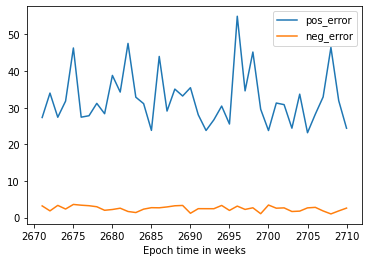

In [33]:
filtered_df.groupby('ts')[['neg_error', 'pos_error', 'pos_error_ratio']].agg('mean').reset_index().plot(x='ts', y=['pos_error', 'neg_error'], xlabel='Epoch time in weeks')

In [19]:
filtered_df.describe()

,Unnamed: 0,ts,src,dst,dst_neg,pos_label,neg_label,pos_pred,neg_pred,neg_error,pos_error,pos_error_ratio
count,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.0,3682.000000,3.682000e+03,3.682000e+03,3682.000000,3682.000000
mean,1850.421238,2689.943509,813.882672,1819.724335,1818.324823,36.285087,0.0,12.855001,2.454412e+00,2.454421e+00,32.511561,0.888733
std,1069.425456,11.619152,482.831640,62.668499,58.083976,71.690126,0.0,10.661819,6.767590e+00,6.767586e+00,67.725317,2.530751
min,0.000000,2671.000000,3.000000,1718.000000,1718.000000,-556.710000,0.0,-0.000194,-5.378015e-04,8.077936e-22,0.003026,0.000101
25%,925.250000,2680.000000,390.000000,1766.000000,1767.000000,11.000000,0.0,4.411263,-5.180644e-07,4.068382e-07,5.814429,0.398844
50%,1848.500000,2690.000000,785.000000,1833.000000,1817.000000,21.630000,0.0,9.844317,3.150639e-07,5.045792e-06,14.099841,0.711730
75%,2777.750000,2700.000000,1233.000000,1884.000000,1870.000000,41.422500,0.0,21.411159,5.943217e-05,7.509346e-05,32.230313,0.998965
max,3701.000000,2710.000000,1715.000000,1917.000000,1917.000000,1002.190000,0.0,45.778028,4.217010e+01,4.217010e+01,997.100011,99.727643


In [18]:
filtered_df.groupby('src').nunique().describe()

,Unnamed: 0,ts,dst,dst_neg,pos_label,neg_label,pos_pred,neg_pred,ts_src_dst_neg,neg_error,pos_error,pos_error_ratio
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.0,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,4.100223,3.857461,2.398664,4.035635,3.966592,1.0,4.100223,4.097996,4.097996,4.097996,4.100223,4.100223
std,3.981420,3.515812,1.652429,3.836813,3.804152,0.0,3.981420,3.979235,3.979235,3.979235,3.981420,3.981420
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,2.000000,3.000000,3.000000,1.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,5.000000,5.000000,3.000000,5.000000,5.000000,1.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,25.000000,25.000000,10.000000,24.000000,25.000000,1.0,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000


Text(0.5, 1.0, 'Distribution of transaction amount')

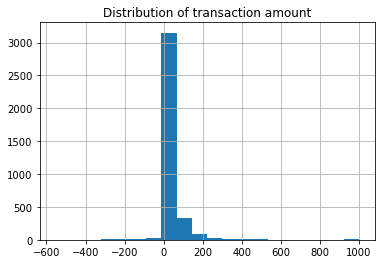

In [24]:
import matplotlib.pyplot as plt
filtered_df.hist(column='pos_label', bins=20, )
plt.title('Distribution of transaction amount')

<AxesSubplot:xlabel='pos_label', ylabel='[pos_error_ratio]'>

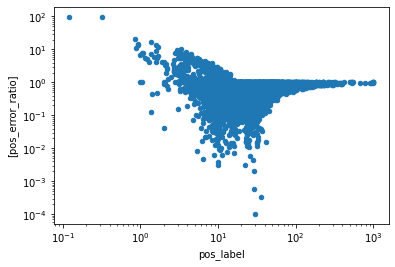

In [59]:
filtered_df.plot(x='pos_label', y=['pos_error_ratio'], kind='scatter', logy=True, logx=True)

<AxesSubplot:xlabel='pos_label', ylabel='[pos_error]'>

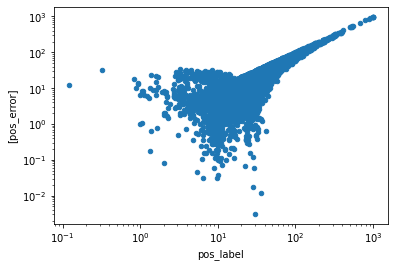

In [58]:
filtered_df.plot(x='pos_label', y=['pos_error'], kind='scatter', logy=True, logx=True)

Text(0.5, 1.0, 'Predicted vs. actual trx amount')

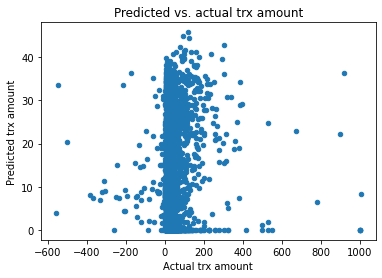

In [23]:
filtered_df.plot(x='pos_label', y=['pos_pred'], kind='scatter', xlabel='Actual trx amount', ylabel='Predicted trx amount')
plt.title('Predicted vs. actual trx amount')

<AxesSubplot:xlabel='cbrt_label', ylabel='[cbrt_pred]'>

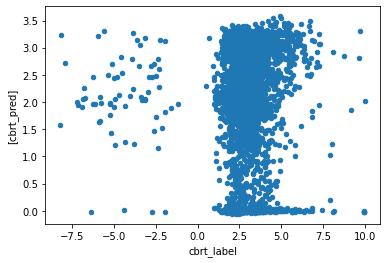

In [65]:
import numpy as np
filtered_df['cbrt_label'] =  np.cbrt(filtered_df['pos_label'])
filtered_df['cbrt_pred'] =  np.cbrt(filtered_df['pos_pred'])
filtered_df.plot(x='cbrt_label', y=['cbrt_pred'], kind='scatter')

In [29]:
from sklearn.linear_model import LinearRegression
def plot_reg(df, x, y, xlabel, ylabel, title):
    X = df[x].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
    Y = df[y].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)

    plt.scatter(X, Y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.plot(X, Y_pred, color='red')
    plt.show()

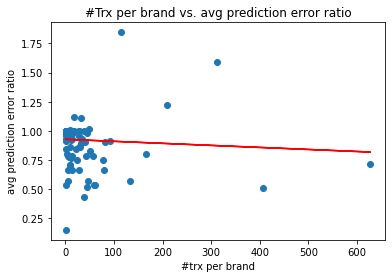

In [31]:
dst_df = filtered_df.groupby('dst').agg({'pos_error_ratio':'mean', 'src':'size'}).reset_index()
# .plot(x='src', y=['pos_error_ratio'], kind='scatter', logx=True, xlabel='#trx per customer', ylabel='avg prediction error ratio')
# plt.title('#Trx per brand vs. avg prediction error ratio')
plot_reg(dst_df, 'src', 'pos_error_ratio', xlabel='#trx per brand', ylabel='avg prediction error ratio', title='#Trx per brand vs. avg prediction error ratio')

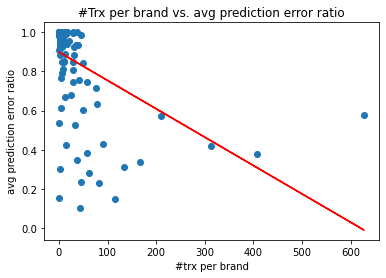

In [34]:
dst_agg_df = filtered_df.groupby('dst').agg({'pos_pred':'sum', 'pos_label':'sum', 'src':'size'}).reset_index().copy()
dst_agg_df['pos_error'] = abs(dst_agg_df.pos_label - dst_agg_df.pos_pred)
dst_agg_df['pos_error_ratio'] = abs((dst_agg_df.pos_label - dst_agg_df.pos_pred)/dst_agg_df.pos_label)
# dst_agg_df.plot(x='src', y=['pos_error_ratio'], kind='scatter', logx=True, logy=True)
plot_reg(dst_agg_df, 'src', 'pos_error_ratio', xlabel='#trx per brand', ylabel='avg prediction error ratio', title='#Trx per brand vs. avg prediction error ratio')

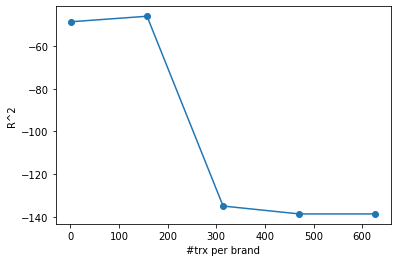

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Count the number of each unique "x" value in the dataframe
import numpy as np
dst_counts = filtered_df["dst"].value_counts().sort_index()
min_val = min(dst_counts)
max_val = max(dst_counts)

# Create a list of 10 equally spaced points between min and max
count_linespace = np.linspace(min_val, max_val, 5)
count_bins = count_linespace.tolist()

# Calculate R^2 on subsets of the dataframe based on the count of "src"
r2_values = []
for i in range(len(count_bins)):
    lower_bound = count_bins[i]
    if i == len(count_bins) - 1:
        upper_bound = np.inf
    else:
        upper_bound = count_bins[i+1]
    subset_indices = dst_counts[(dst_counts >= lower_bound)].index
    subset = filtered_df[filtered_df["dst"].isin(subset_indices)]
    r2 = r2_score(subset["pos_pred"], subset["pos_label"])
    r2_values.append(r2)

# Plot R^2 vs lower bound of x count
plt.plot(count_bins, r2_values, marker="o")
plt.xlabel("#trx per brand")
plt.ylabel("R^2")
plt.show()

In [38]:
r2_score(filtered_df["neg_pred"], filtered_df["neg_label"])

-0.13156640335707426

In [33]:
count_bins

[1.0, 157.5, 314.0, 470.5, 627.0]

In [28]:
count_bins

[1.0,
 70.55555555555556,
 140.11111111111111,
 209.66666666666669,
 279.22222222222223,
 348.77777777777777,
 418.33333333333337,
 487.8888888888889,
 557.4444444444445,
 627.0]

In [46]:
filtered_df['month'] = filtered_df['ts'] // 4

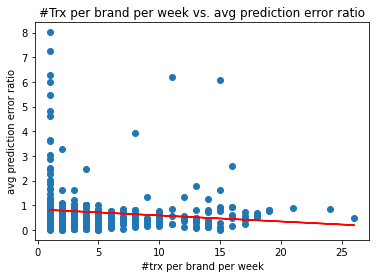

In [58]:
dst_agg_df = filtered_df.groupby(['dst', 'ts']).agg({'pos_pred':'sum', 'pos_label':'sum', 'src':'size'}).reset_index().copy()
dst_agg_df['pos_error'] = abs(dst_agg_df.pos_label - dst_agg_df.pos_pred)
dst_agg_df['pos_error_ratio'] = abs((dst_agg_df.pos_label - dst_agg_df.pos_pred)/dst_agg_df.pos_label)
# dst_agg_df.plot(x='src', y=['pos_error_ratio'], kind='scatter', logx=True, logy=True)
plot_reg(dst_agg_df, 'src', 'pos_error_ratio', xlabel='#trx per brand per week', ylabel='avg prediction error ratio', title='#Trx per brand per week vs. avg prediction error ratio')

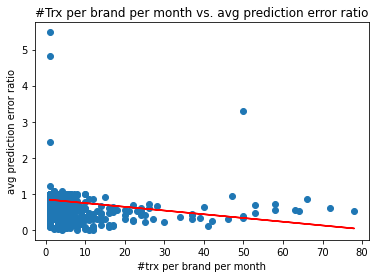

In [57]:
dst_agg_df = filtered_df.groupby(['dst', 'month']).agg({'pos_pred':'sum', 'pos_label':'sum', 'src':'size'}).reset_index().copy()
dst_agg_df['pos_error'] = abs(dst_agg_df.pos_label - dst_agg_df.pos_pred)
dst_agg_df['pos_error_ratio'] = abs((dst_agg_df.pos_label - dst_agg_df.pos_pred)/dst_agg_df.pos_label)
# dst_agg_df.plot(x='src', y=['pos_error_ratio'], kind='scatter', logx=True, logy=True)
plot_reg(dst_agg_df, 'src', 'pos_error_ratio', xlabel='#trx per brand per month', ylabel='avg prediction error ratio', title='#Trx per brand per month vs. avg prediction error ratio')

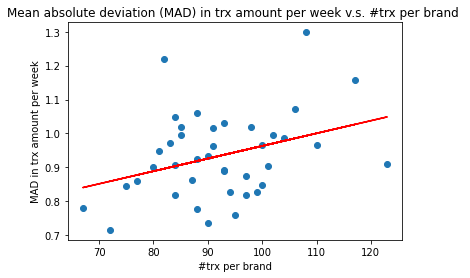

In [56]:
import numpy as np
dst_ts_agg_df = filtered_df.groupby(['dst', 'ts']).agg({'pos_pred':'sum', 'pos_label':'sum', 'src':'size'}).reset_index().copy()
dst_group_df = dst_ts_agg_df.groupby('ts').agg({'pos_label':lambda x: np.mean(np.abs(x - np.mean(x)))/np.mean(x), 'src':'sum'}).reset_index().copy()
dst_group_df['pos_label']
# dst_agg_df.plot(x='src', y=['pos_error_ratio'], kind='scatter', logx=True, logy=True)
plot_reg(dst_group_df, 'src', 'pos_label', xlabel='#trx per brand', ylabel='MAD in trx amount per week', title='Mean absolute deviation (MAD) in trx amount per week v.s. #trx per brand ')

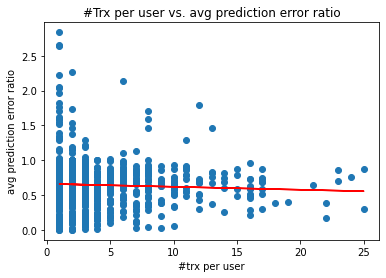

In [44]:
src_agg_df = filtered_df.groupby('src').agg({'pos_pred':'sum', 'pos_label':'sum', 'dst':'size'}).reset_index().copy()
src_agg_df['pos_error'] = abs(src_agg_df.pos_label - src_agg_df.pos_pred)
src_agg_df['pos_error_ratio'] = abs((src_agg_df.pos_label - src_agg_df.pos_pred)/src_agg_df.pos_label)
src_agg_df = src_agg_df[src_agg_df['pos_error_ratio'] < 3]
# src_agg_df.dropna(inplace=True, axis=0)
# dst_agg_df.plot(x='src', y=['pos_error_ratio'], kind='scatter', logx=True, logy=True)
plot_reg(src_agg_df, 'dst', 'pos_error_ratio', xlabel='#trx per user', ylabel='avg prediction error ratio', title='#Trx per user vs. avg prediction error ratio')

In [75]:
dst_agg_df[dst_agg_df['src']>10].sort_values(by=['pos_error_ratio'])

,dst,pos_pred,pos_label,src,pos_error,pos_error_ratio
19,1755,369.497103,410.43,44,40.932897,0.099732
99,1879,1186.190102,1393.42,115,207.229898,0.148720
75,1840,2038.596115,2653.28,82,614.683885,0.231669
14,1749,1297.856460,1692.73,46,394.873540,0.233276
80,1846,1569.316491,2185.46,62,616.143509,0.281929
22,1760,1185.871097,1728.21,133,542.338903,0.313815
74,1839,2059.809506,3114.24,166,1054.430494,0.338584
4,1727,955.583524,1461.70,38,506.116476,0.346252
102,1884,3614.575490,5833.65,407,2219.074510,0.380392
68,1831,776.771382,1256.95,58,480.178618,0.382019


<AxesSubplot:xlabel='src', ylabel='[pos_error]'>

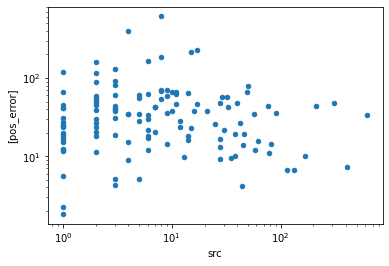

In [66]:
filtered_df.groupby('dst').agg({'pos_error':'mean', 'src':'size'}).reset_index().plot(x='src', y=['pos_error'], kind='scatter', logx=True, logy=True)

<AxesSubplot:xlabel='dst', ylabel='[pos_error_ratio]'>

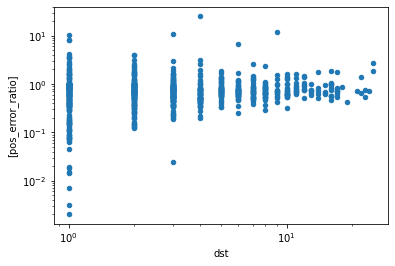

In [56]:
filtered_df.groupby('src').agg({'pos_error_ratio':'mean', 'dst':'count'}).reset_index().plot(x='dst', y=['pos_error_ratio'], kind='scatter', logx=True, logy=True)

<AxesSubplot:xlabel='dst', ylabel='[pos_error]'>

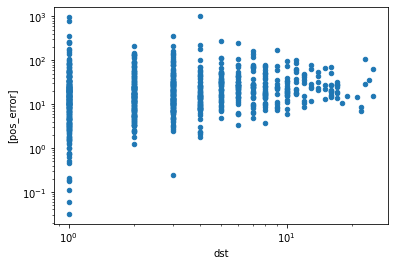

In [62]:
filtered_df.groupby('src').agg({'pos_error':'mean', 'dst':'count'}).reset_index().plot(x='dst', y=['pos_error'], kind='scatter', logx=True, logy=True)